In [1]:
from am4pa.linnea import LinneaConfig, MeasurementsLinnea
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/visualization/footprints/__init__.py:21: UserWarning: The footprints visualizer will be removed in a future release.
  warnings.warn("The footprints visualizer will be removed in a future release.")


In [2]:
linnea_config = LinneaConfig("MatrixChain4",4)
linnea_config.set_local_directory("linnea/matrix-chain-4/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/va4algs-exps/matrix-chain-4/")

In [3]:
linnea_config.connect_backend()

In [4]:
op_sizes = ["1000","1000","10","1000","1000"]
ms = MeasurementsLinnea(linnea_config,op_sizes)
ms.generate_variants(bGenerate=False)
dc = ms.data_collector
log = dc.get_meta_table()

In [5]:
log

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",tmp3 = (C D),2022-12-20 15:53:12.869753
1,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",tmp1 = (A B),2022-12-20 15:53:13.869753
2,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",tmp6 = (tmp1 tmp3),2022-12-20 15:53:14.869753
3,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:56:32.869753
4,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",tmp4 = (tmp1 C),2022-12-20 15:56:33.869753
5,algorithm2,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml5, ml3, 0.0, ml6)",tmp6 = (tmp4 D),2022-12-20 15:56:34.869753
6,algorithm4,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml1, ml2, 0.0, ml4)",tmp2 = (B C),2022-12-20 15:59:52.869753
7,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml4, ml3, 0.0, ml5)",tmp5 = (tmp2 D),2022-12-20 15:59:53.869753
8,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml0, ml5, 0.0, ml6)",tmp6 = (A tmp5),2022-12-20 15:59:54.869753
9,algorithm1,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:54:52.869753


In [7]:
xes_log = log_converter.apply(log)

In [8]:
def filtered_log_by_case_list(log,case_list):
    filtered_log = pm4py.filter_log(lambda x: x.attributes['concept:name'] in case_list, log)
    return filtered_log

In [9]:
var_list1 = ['algorithm0', 'algorithm1']
var_list2 = ['algorithm2', 'algorithm3']

xes_log1 = filtered_log_by_case_list(xes_log, ['algorithm0', 'algorithm1'])
xes_log2 = filtered_log_by_case_list(xes_log, ['algorithm2', 'algorithm3'])

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/2472590.py:2: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  filtered_log = pm4py.filter_log(lambda x: x.attributes['concept:name'] in case_list, log)
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [10]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.objects.log.obj import EventLog
from graphviz.graphs import Digraph
from typing import List, Dict
import pydot
import pygraphviz as pgv
import graphviz

In [158]:
def gviz_dfg_diff(dfg1:Digraph, dfg2:Digraph, node_color='#F0B4B6', edge_color='red'):
    """DFG difference: dfg1 - dfg2"""
    
    g1 = pgv.AGraph(dfg1.source)
    g2 = pgv.AGraph(dfg2.source)
    
    g1_node_id = {}
    g1_node_label = {}
    for node in g1.nodes():
        #skip start and end nodes
        if '@@' not in node.name:
            label = node.attr['label'].split(') (')[0]+')'
            g1_node_id[label] = node.name
            g1_node_label[node.name] = label
            
    g2_node_id = {}
    for node in g2.nodes():
        #skip start and end nodes
        if '@@' not in node.name:
            g2_node_id[node.attr['label'].split(') (')[0]+')'] = node.name
        
    # Node subtraction
    for k,v in g1_node_id.items():
        node = g1.get_node(v)
        node.attr['label'] = k
        if k not in list(g2_node_id.keys()):
            node.attr['fillcolor'] = node_color
        else:
            node.attr['fillcolor'] = '#FFFFFF'
            
    # Edge subtraction
    for edge in g1.edges():
        n1_label = g1.get_node(edge[0]).attr['label']
        n2_label = g1.get_node(edge[1]).attr['label']
        
        try:
            n1_label = g1_node_label[g1.get_node(edge[0]).name]
            n2_label = g1_node_label[g1.get_node(edge[1]).name]
        except KeyError: #happens for start and end nodes
            continue
        
        try:    
            if (g2_node_id[n1_label], g2_node_id[n2_label]) not in g2.edges():
                edge.attr['color'] = edge_color
        except KeyError: #happens for nodes that doesnt exist in g2
            edge.attr['color'] = edge_color
        
            
    return graphviz.Source(g1.string())

In [159]:
class DFGCompare:
    def __init__(self, log:EventLog, log_best:EventLog, log_worst:EventLog,
                activity_key:str = 'concept:name'):
        self.log = log
        self.log_best = log_best
        self.log_worst = log_worst
        self.activity_key = activity_key
        
        self._dfg = {}
        self._dfg_best = {}
        self._dfg_worst = {}
        
    def _store_dfg(self, log:EventLog, store_var:Dict ):
        if not store_var:
            dfg, im, fm = pm4py.discover_dfg(log, activity_key=self.activity_key)
            store_var['model'] = dfg
            store_var['im'] = im
            store_var['fm'] = fm
            
    def _get_dfg_gviz(self, dfg:Dict):
        
        dfg_parameters = dfg_visualizer.Variants.FREQUENCY.value.Parameters
        parameters = {}
        parameters[dfg_parameters.START_ACTIVITIES] = dfg["im"]
        parameters[dfg_parameters.END_ACTIVITIES] = dfg["fm"]
        
        return dfg_visualizer.apply(dfg["model"], parameters=parameters)
        
    
    def get_dfg(self) -> Digraph:
        if not self._dfg:
            self._store_dfg(self.log, self._dfg)
            
        return self._get_dfg_gviz(self._dfg)
    
    def get_dfg_best(self) -> Digraph:
        if not self._dfg_best:
            self._store_dfg(self.log_best, self._dfg_best)
            
        return self._get_dfg_gviz(self._dfg_best)
    
    def get_dfg_worst(self) -> Digraph:
        if not self._dfg_worst:
            self._store_dfg(self.log_worst, self._dfg_worst)
            
        return self._get_dfg_gviz(self._dfg_worst)

In [162]:
class VariantsCompare:
    def __init__(self, log:EventLog, variants_best:List, variants_worst:List, 
                 variants_id_key = "concept:name",
                activity_key="concept:name"):
        
        self.variants = variants_best + variants_worst
        self.best = variants_best.copy()
        self.worst = variants_worst.copy()
        
        self.log_filtered = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.variants, log)
        self.log_best = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.best, self.log_filtered)
        self.log_worst = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.worst, self.log_filtered)
        
        self.dfg_compare = DFGCompare(self.log_filtered, self.log_best, self.log_worst,activity_key)
                 
       
    def get_dfg_minus_best(self):
        return gviz_dfg_diff(self.dfg_compare.get_dfg(), self.dfg_compare.get_dfg_best())
        
        
    #def get_dfg_best(self):
        
        

In [163]:
vc = VariantsCompare(xes_log,var_list1, var_list2,activity_key='concept:operation')

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/589044828.py:10: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  self.log_filtered = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.variants, log)
/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/589044828.py:11: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  self.log_best = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.best, self.log_filtered)
/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/589044828.py:12: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  self.log_worst = pm4py.filter_log(lambda x: x.attributes[variants_id_key] in self.worst, self.log_filtered)


In [164]:
gviz = vc.get_dfg_minus_best()

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/3048988017.py:15: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, im, fm = pm4py.discover_dfg(log, activity_key=self.activity_key)
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


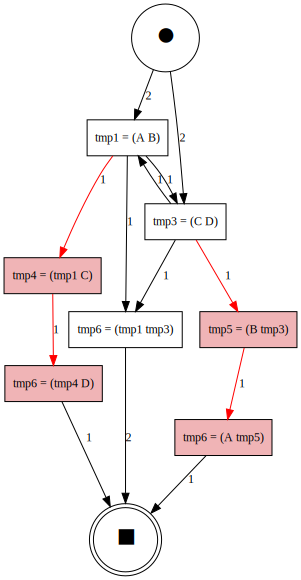

In [165]:
gviz

In [13]:
gviz = vc.dfg_compare.get_dfg()

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/2849726518.py:15: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, im, fm = pm4py.discover_dfg(log, activity_key=self.activity_key)


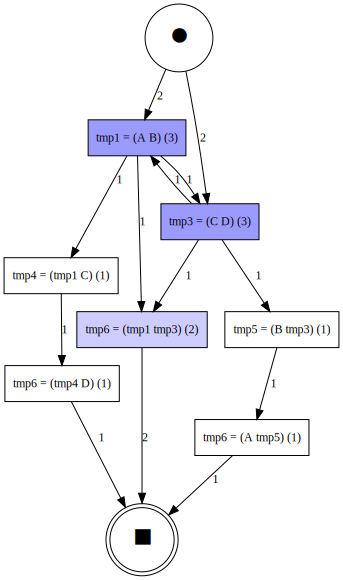

In [14]:
gviz

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_91239/2849726518.py:15: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, im, fm = pm4py.discover_dfg(log, activity_key=self.activity_key)
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


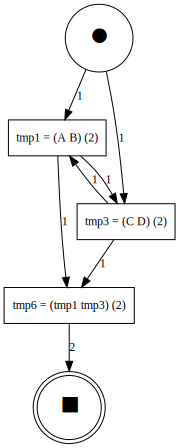

In [15]:
gviz = vc.dfg_compare.get_dfg_best()
gviz

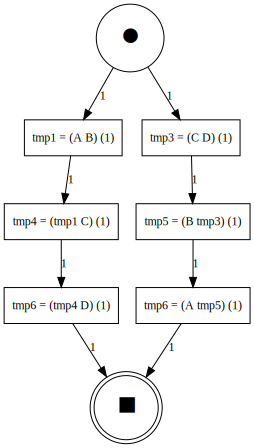

In [50]:
gviz = vc.dfg_compare.get_dfg_worst()
gviz

In [51]:
print(gviz)

digraph {
	graph [bgcolor=white]
	node [shape=box]
	8901912788668851129 [label="tmp1 = (A B) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	-6734229709781855429 [label="tmp3 = (C D) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	-2072121191406608918 [label="tmp4 = (tmp1 C) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	1851547077134861038 [label="tmp5 = (B tmp3) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	8894626897231169201 [label="tmp6 = (A tmp5) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	-576395195953246347 [label="tmp6 = (tmp4 D) (1)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	8901912788668851129 -> -2072121191406608918 [label=1 fontsize=12 penwidth=1.0]
	-6734229709781855429 -> 1851547077134861038 [label=1 fontsize=12 penwidth=1.0]
	-2072121191406608918 -> -576395195953246347 [label=1 fontsize=12 penwidth=1.0]
	1851547077134861038 -> 8894626897231169201 [label=1 fontsize=12 penwidth=1.0]
	"@@startnode" [label=<&#9679;> fontsize=34 shape=circle]


In [53]:
#graph = pydot.graph_from_dot_data(gviz.source)
graph = pgv.AGraph(gviz.source)

In [54]:
graph.nodes()

['8901912788668851129',
 '-6734229709781855429',
 '-2072121191406608918',
 '1851547077134861038',
 '8894626897231169201',
 '-576395195953246347',
 '@@startnode',
 '@@endnode']

In [107]:
node = graph.get_node('8901912788668851129')
edge = graph.get_edge('8901912788668851129', '-2072121191406608918')

In [110]:
node.attr['fillcolor'] = '#F0B4B6'
edge.attr['color'] = 'red'

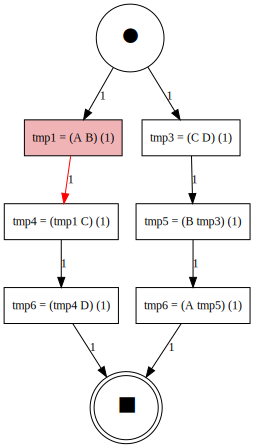

In [111]:
graphviz.Source(graph.string())

In [126]:
node_id = {}
for node in graph.nodes():
    if '@@' not in node.name:
        node_id[node.attr['label'].split(') (')[0]+')'] = node.name

In [127]:
node_id

{'tmp1 = (A B)': '8901912788668851129',
 'tmp3 = (C D)': '-6734229709781855429',
 'tmp4 = (tmp1 C)': '-2072121191406608918',
 'tmp5 = (B tmp3)': '1851547077134861038',
 'tmp6 = (A tmp5)': '8894626897231169201',
 'tmp6 = (tmp4 D)': '-576395195953246347'}

In [79]:
node_id.keys()

dict_keys(['tmp1 = (A B) (1)', 'tmp3 = (C D) (1)', 'tmp4 = (tmp1 C) (1)', 'tmp5 = (B tmp3) (1)', 'tmp6 = (A tmp5) (1)', 'tmp6 = (tmp4 D) (1)'])

In [86]:
for edge in graph.edges():
    edge.get_name()

In [98]:
('8901912788668851129', '-2072121191406608918') in graph.edges()

True

In [112]:
 graph.edges()[0].attr['color']

'red'

In [113]:
type(gviz)

graphviz.graphs.Digraph

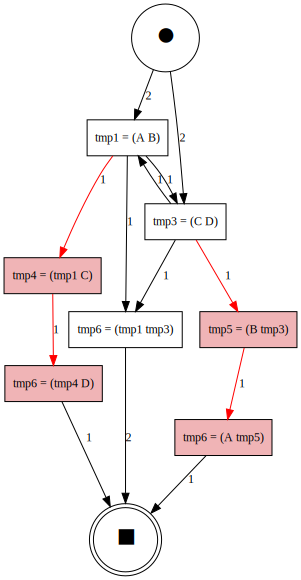

In [155]:
gviz = gviz_dfg_diff(vc.dfg_compare.get_dfg(), vc.dfg_compare.get_dfg_best())
gviz

In [118]:
graph.get_node('8901912788668851129')

'8901912788668851129'

In [141]:
"@@" in graph.edges()[-1][0]

True